<h1> Poker Face: </h1>
<hr>
<h2>Predicting Programming Languages from Poker GitHub REPOs<h2/>
<h4>David Mitchell, Vasiliy Melkozerov, Fred Lidnsey<h4/>
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

## Project Outline
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

### 1. Acquire, prepare and data from scraping GitHub's API.

- Scrape 500 poker themed repositories from GitHub to annalyze the README for programming language
- Split into train, validate, test sets.
- create an encoded data set for modeling.
<br>
        
### 2. Modeling:

- produce a predictive classification model to predict the dominant programming language from a GitHub README file
- Run the highest performing model on the test data
    
### 3. Recommendations:

- recommendations for improving model accuracy

## EXSUM and The Big Picture: 
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<h3> Takeaways </h3>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">
<h4> 1. The best perfoming classifier was a Decision Tree Classifier with a max depth value of 9 </h4>
    
<h4> 2. However the most robust DTC model was max depth 5, with a train/val difference of 13%, vs the higher performing model's 18.7% train/val difference.</h4>
    
<h4>3. The final DTC model performed with a prediction accuracy of 40% on test data </h4>
 This is higher than initial performance on validate data. While this is a generally good indicator, more refinement is needed on this model before I can recommend it for deployment as a predictive.

## 1. Acquire/Prep/Clean/Split 
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

In [1]:
import util
df = util.get_NLP_df()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             500 non-null    object
 1   language         481 non-null    object
 2   readme_contents  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [2]:
df = util.get_labeled_df()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            440 non-null    int64 
 1   repo             440 non-null    object
 2   language         440 non-null    object
 3   readme_contents  440 non-null    object
 4   content          440 non-null    object
 5   stemmed_content  440 non-null    object
 6   lemmed_content   440 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


In [3]:
df = util.remove_under_represented_values()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            418 non-null    int64 
 1   repo             418 non-null    object
 2   language         418 non-null    object
 3   readme_contents  418 non-null    object
 4   content          418 non-null    object
 5   stemmed_content  418 non-null    object
 6   lemmed_content   418 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.1+ KB


### Notes on Data Acquisition:

    1. Initially acquired 500 READMEs
    2. After removing duplicates the number was 440
    3. After removing under represented values to accomodate the train/test split, the total number of values was reduced to 418.

<h1>2. Modeling</h1>
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

1. Decision Tree Model
2. Random Forest Model
3. Logistic Regression Model

In [4]:
train, validate, test = util.split_and_vectorize(df)

233 101 84


In [5]:
X_train, y_train, X_validate, y_validate, X_test, y_test = util.build_X_and_y(train, validate, test)

## 1. Decision  Tree Model

In [6]:
df = util.DTC_model_and_df(X_train, y_train, X_validate, y_validate)
df.head(3)

,max_depth,training_accuracy,validate_accuracy,difference
9,10,0.635193,0.435644,0.199550
8,9,0.613734,0.425743,0.187991
6,7,0.579399,0.405941,0.173459


<Figure size 864x648 with 0 Axes>

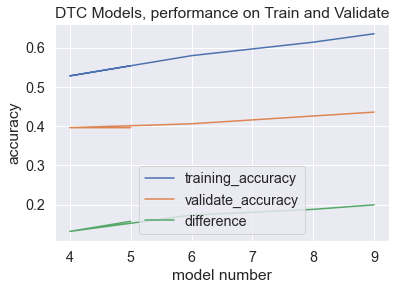

In [7]:
util.visualize_DTC(df)

<div class="alert alert-block alert-success"> 
 <b>Note</b>: I selected model #9, max depth of 10, because it had the lowest train/val difference of the top 3 performing DTC classifiers
</div>

## 2. Random Forest Classifier 

In [8]:
df = util.RFC_model_and_df(X_train, y_train, X_validate, y_validate)
df.head(3)

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,difference
210,15,1,0.776824,0.396040,0.380784
181,13,2,0.643777,0.386139,0.257638
196,14,2,0.652361,0.386139,0.266222


<Figure size 1080x720 with 0 Axes>

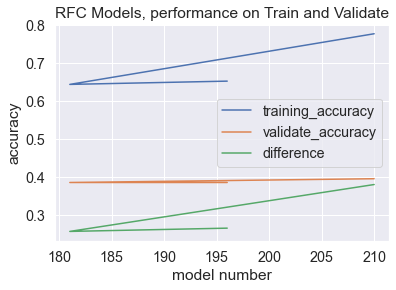

In [9]:
util.visualze_RFC(df)

<div class="alert alert-block alert-warning"> 
    <b>Random Forest Classifier Takeaways:</b>
1. the best performing model had the following features:
    <br>
    a. max depth of 15
    <br>
    b. min_samples_leaf of 2
    <br>
    c. predictive classification accuracy of <b>39.6%</b> on validate (out of sample) data.
</div>

## 3. Logistic Regression Classifier 

In [10]:
util.LRC_model_and_df(X_train, y_train, X_validate, y_validate)

,c_values,training_accuracy,validate_accuracy,train_val_diff
0,1,0.575107,0.376238,0.19887


<div class="alert alert-block alert-warning"> 
    <b>Logistic Regression Classifier Takeaways:</b>
    <br>
1. the best performing model had the following features:
    <br>
    a. c_value of 1
    <br>
    b. predictive classification accuracy of <b>37.6%</b> on validate (out of sample) data.
</div>

# 3. Key Findings and Recommendations
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<h3> Takeaways </h3>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">
<h4> 1. The best perfoming classifier was a Decision Tree Classifier with a max depth value of 10 </h4>
    
<h4>2. The final DTC model performed with a prediction accuracy of 40% on test data </h4>
 This is higher than initial performance on validate data. While this is a generally good indicator, more refinement is needed on this model before I can recommend it for deployment as a predictive.

<h2> Recommendations </h2>
<br>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">

<b> 1. Moving Forward: recommendations to improve the model</b>
    The best performing model achieved an accruacy of ~40%. Future models will benefit from the addtion of bigram and trigram analysis in the README corpus, and also from removing words that are common to all repos - this would reduce the noise in the data set.
